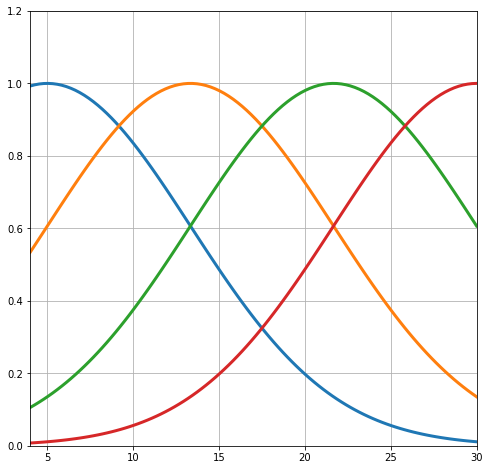

In [25]:
import numpy as np    
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X=5+25*np.random.rand(X_n)

#X는 나이, T는 키

prm_c=[170,108,0.2]
T=prm_c[0]-prm_c[1]*np.exp(-prm_c[2]*X)+4*np.random.randn(X_n)
np.savez('ch.6_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))     #가우스함수

M=4   #4개의 가우스함수를 만들겠다
plt.figure(figsize=(8,8))
mu=np.linspace(5,30,M)    #5에서30사이를 4등분 [5,11,17,23]
s=mu[1]-mu[0]
xb=np.linspace(X_min,X_max,100)   #4부터30까지 100개구간으로 나누기
for j in range(M):    #포문이 돌면서 가우스함수 4개를 만들어줌
    y=gauss(xb,mu[j],s)
    plt.plot(xb,y,linewidth=3)
    
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()
#파란게 파이1(가우스함수1),주황이 파이2,초록이 파이3,빨강이 파이4
#파이1의 중심이 mu[0],2의 중심이 mu[2]....

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


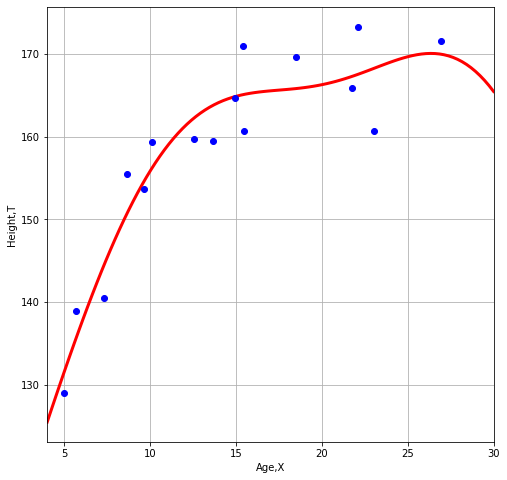

In [30]:
def gauss_func(w,x):   #가우스함수함수만듬
    m=len(w)-1       #w는 y=w0x0+w1x1+w2x2+...에서의 w이다 M=4이니 len(w)=4
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    y=np.zeros_like(x)
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]
    return y
    
def mse_gauss_func(x,t,w):    #가우스함수의 평균제곱오차를 계산하는 함수
    y=gauss_func(w,x)
    mse=np.mean((y-t)**2)    #t는 훈련데이터의 출력
    return mse

def fit_gauss_func(x,t,m):   #가우스함수를 fitting, 이게 선형기저함수모델 코드
    mu=np.linspace(5,30,m)   #x는 훈련데이터입력, t는 훈련데이터 출력, m은 기저함수의 개수
    s=mu[1]-mu[0]
    n=x.shape[0]   
    psi=np.ones((n,m+1))
    for j in range(m):
        psi[:,j]=gauss(x,mu[j],s)  #이게 파이행렬
    psi_T=np.transpose(psi)  
    
    b=np.linalg.inv(psi_T.dot(psi))   #선형대수 라이브러리
    c=b.dot(psi_T)
    w=c.dot(t)
    return w  #  w=((파이T * 파이)^(-1))파이T*t

def show_gauss_func(w):
    xb=np.linspace(X_min,X_max,100)
    y=gauss_func(w,xb)
    plt.plot(xb,y,'r-',linewidth=3)
    plt.xlabel('Age,X')
    plt.ylabel('Height,T')
    
plt.figure(figsize=(8,8))
M=4
W=fit_gauss_func(X,T,M)
show_gauss_func(W)

plt.plot(X,T,'bo')
plt.xlim(X_min,X_max)
plt.grid(True)

mse=mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

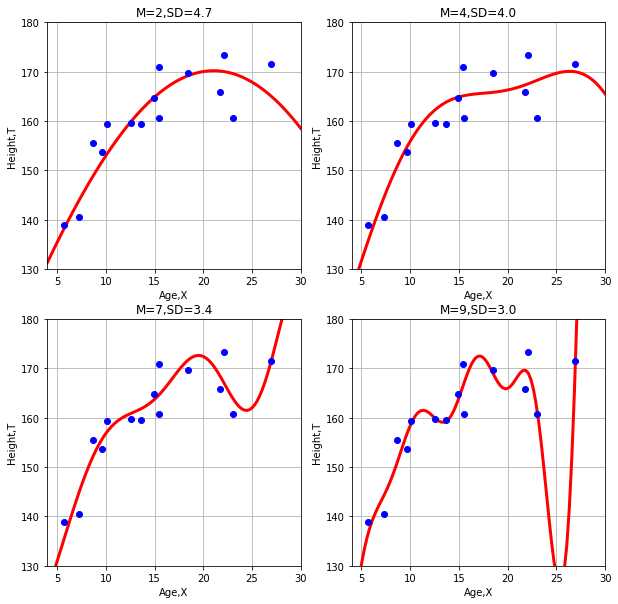

In [33]:
plt.figure(figsize=(10,10))
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(2,2,i+1)
    W=fit_gauss_func(X,T,M[i])
    show_gauss_func(W)
    plt.plot(X,T,'bo')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    plt.ylim(130,180)
    mse=mse_gauss_func(X,T,W)
    plt.title("M={0:d},SD={1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()